In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
TRAIN = pd.read_csv('Data/train_imputed.csv')
TEST = pd.read_csv('Data/test_imputed.csv')
TRAIN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
TARGET_COL = 'Item_Outlet_Sales'
CONTINUOUS_VAR = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
CATEGORICAL_VAR = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                   'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

## Checking Outlier with Boxplot

In [71]:
def Box_Plot(df, var):
    # plot
    plt.figure(figsize=(10,4))
    df[var].plot(kind='box', vert=False)
    plt.grid()
    plt.show()

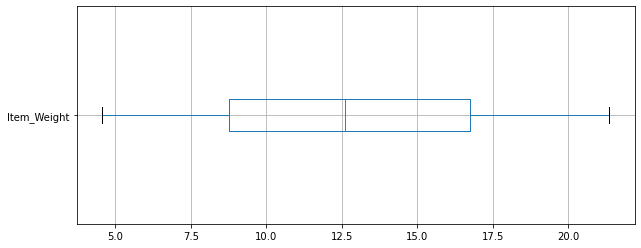

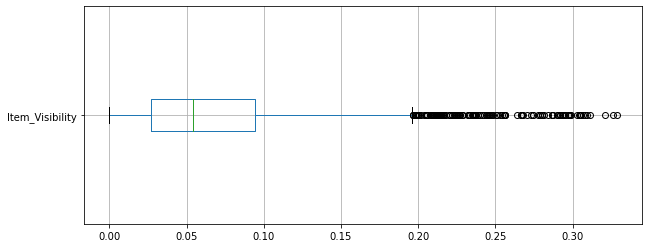

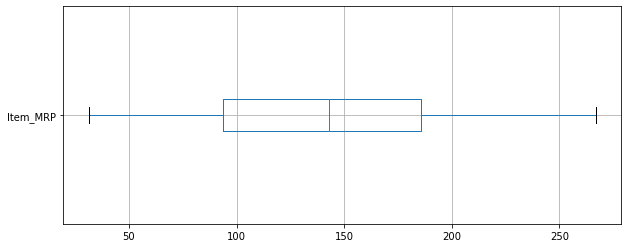

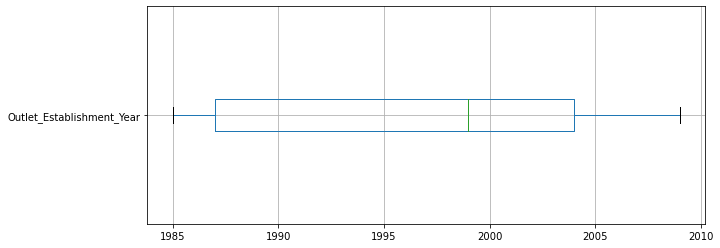

In [72]:
for i in CONTINUOUS_VAR:
    Box_Plot(data, i)

### Only Item visibility variable show's outlier

## Evaluation criterion

In [5]:
# libraries required
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [6]:
#### evaluation metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [7]:
def test_data_and_model(clf, features, data):
    ##### spliting in to train and testing set
    trn, val = train_test_split(df, test_size=0.2, random_state=2)

    ##### Input to our model will be the features
    X_trn, X_val = trn[features], val[features]

    ##### Output to our model will be tha TARGTE_COL
    y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

    #### Scaling data 
    scale = StandardScaler()
    _ = scale.fit(X_trn)

    X_trn = scale.transform(X_trn)
    X_val = scale.transform(X_val)
    
    _ = clf.fit(X_trn, y_trn)
    y_pred = clf.predict(X_val)
    print('RMSE : ', rmse(y_val, y_pred))

# According to Emparical Rule

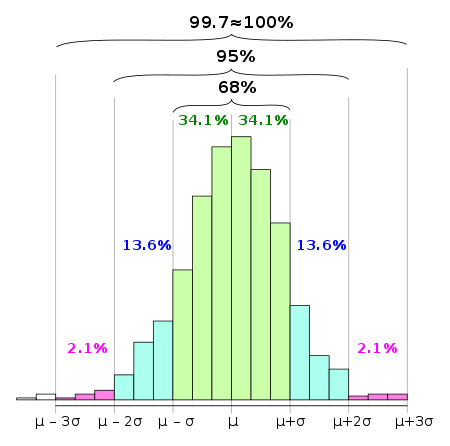

### 68–95–99.7 rule

**Emparical rule states that the 68% of data lie under 1 standard deviation from mean, 95% of data lie under 2 standard deviation from mean and 99.7% of data lie under 3 standard deviation from mean**

In [8]:
#according to emparical rule

In [9]:
data = TRAIN[CONTINUOUS_VAR].copy()

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.837269,0.066132,140.992782,1997.831867
std,4.633929,0.051598,62.275067,8.371760
min,4.555000,0.000000,31.290000,1985.000000
25%,8.770000,0.026989,93.826500,1987.000000
50%,12.600000,0.053931,143.012800,1999.000000
75%,16.750000,0.094585,185.643700,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [11]:
# values between Q1-1.5IQR and Q3+1.5IQR

In [55]:
def Plot_Limits(df, var, std=1.5):
    # calculation
    mean = df[var].mean()
    median = df[var].median()
    sigma = df[var].std()
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - std * IQR
    upper_bound = Q3 - std * IQR

    # y height for distribution
    v = df[var]
    density = gaussian_kde(v)
    xs = np.linspace(v.min(), v.max(), len(v))
    ys = density(xs)
    index = np.argmax(ys)
    max_y = ys[index]
    #max_x = xs[index]
    
    # plot
    plt.figure(figsize=(10,6))
    # desity plot
    df[var].plot(kind='density')
    # mean, median, quartile for distribution
    plt.vlines(mean, 0, max_y, linestyles ="dotted", colors ="r", label='Mean')
    plt.vlines(median, 0, max_y, linestyles ="dotted", colors ="orange", label='Median')
    plt.vlines(Q1, 0, max_y, linestyles ="dotted", colors ="k", label='Quartile')
    plt.vlines(Q3, 0, max_y, linestyles ="dotted", colors ="k")
    plt.vlines(lower_bound, 0, max_y, linestyles ="dotted", colors ="g", label='%r * %.2f' % (std, sigma))
    plt.vlines(upper_bound, 0, max_y, linestyles ="dotted", colors ="g")
    plt.title('Mean : %.2f , Median : %.2f STD : %.2f \n IQR : %.2f U.B : %.2f L.B : %.2f' % (mean, median, sigma, IQR, upper_bound, lower_bound))
    plt.xlabel(var, fontsize=15)
    plt.ylabel("Density",fontsize=15)
    plt.legend()
    plt.grid()
    plt.show()

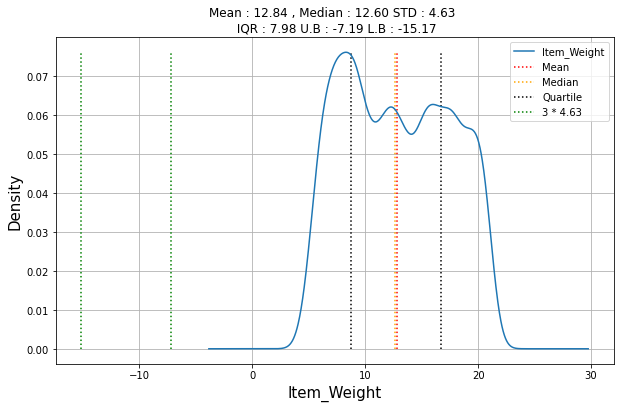

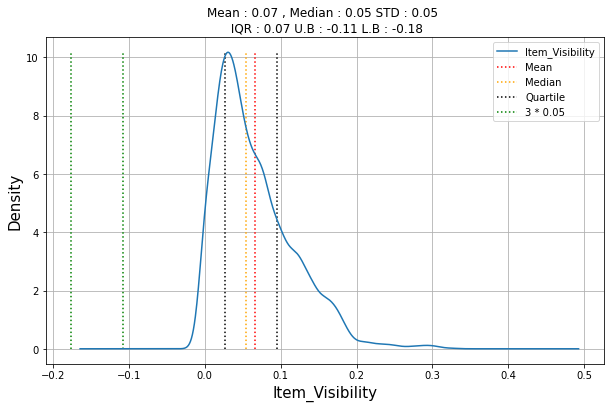

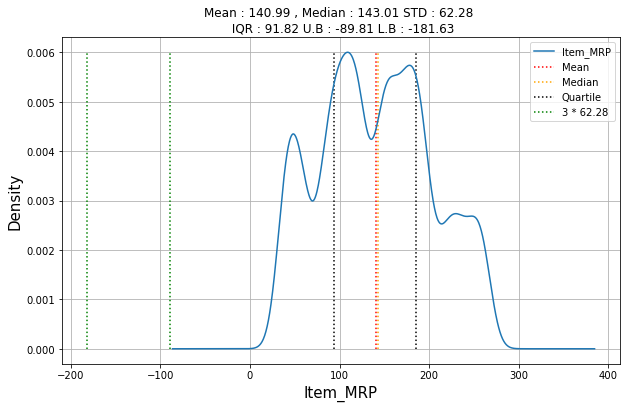

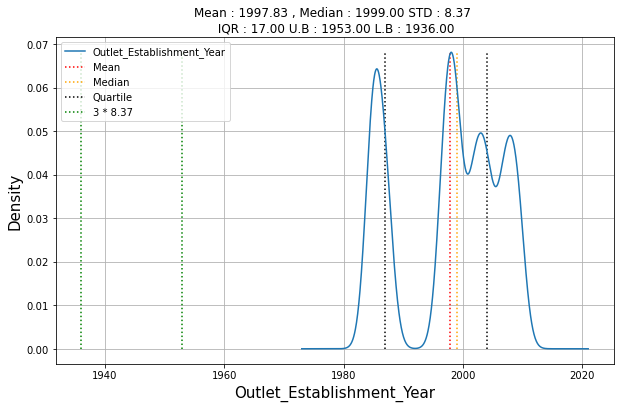

In [56]:
for i in CONTINUOUS_VAR:
    Plot_Limits(data, i, std=3)

## Methods to Change skewness of data(right skeweed)

In [93]:
v = data['Item_Visibility']

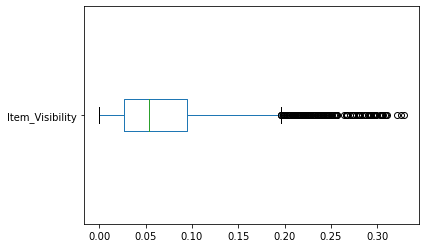

In [94]:
v.plot(kind='box', vert=False)

In [98]:
data = TRAIN.copy()

In [102]:
# encode categorical data
df = pd.get_dummies(data, columns= CATEGORICAL_VAR, drop_first=True)
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1477.3185076941852


### Using Square Root

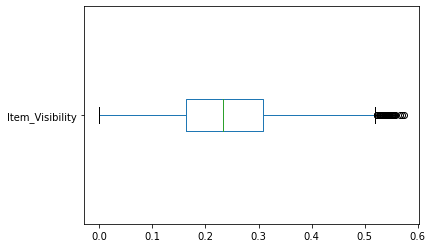

In [96]:
var_sqrt = np.sqrt(v)
var_sqrt.plot(kind='box', vert=False)

In [103]:
data = TRAIN.copy()
data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

# encode categorical data
df = pd.get_dummies(data, columns= CATEGORICAL_VAR, drop_first=True)
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1476.5352893392821


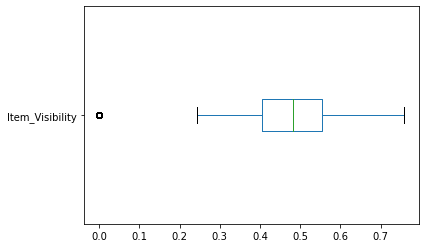

In [106]:
data['Item_Visibility'].plot(kind='box', vert=False)

In [105]:
data = TRAIN.copy()
data['Item_Visibility'] = np.sqrt(np.sqrt(data['Item_Visibility']))

# encode categorical data
df = pd.get_dummies(data, columns= CATEGORICAL_VAR, drop_first=True)
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1476.8720467461426


### Using Qube Root

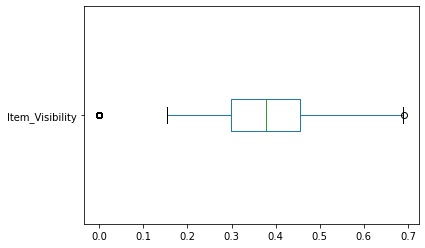

In [97]:
var_cbrt = np.cbrt(v)
var_cbrt.plot(kind='box', vert=False)

In [104]:
data = TRAIN.copy()
data['Item_Visibility'] = np.cbrt(data['Item_Visibility'])

# encode categorical data
df = pd.get_dummies(data, columns= CATEGORICAL_VAR, drop_first=True)
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1476.5041905902292


In [107]:
data = TRAIN.copy()
data['Item_Visibility'] = np.cbrt(np.sqrt(data['Item_Visibility']))

# encode categorical data
df = pd.get_dummies(data, columns= CATEGORICAL_VAR, drop_first=True)
features = [i for i in df.columns if i not in [TARGET_COL]]
test_data_and_model(DecisionTreeRegressor(random_state=1), features, df)

RMSE :  1475.6663450716514


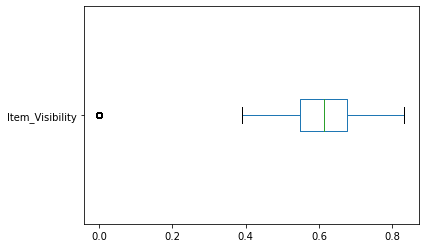

In [108]:
data['Item_Visibility'].plot(kind='box', vert=False)

## Save Cleaned Data

In [118]:
train = TRAIN.copy()
test = TEST.copy()

In [119]:
train['Item_Visibility'] = np.cbrt(np.sqrt(train['Item_Visibility']))
test['Item_Visibility'] = np.cbrt(np.sqrt(test['Item_Visibility']))

In [122]:
file_name = 'train_clean.csv'
train.to_csv('Data/'+file_name, index=False)

In [123]:
file_name = 'test_clean.csv'
test.to_csv('Data/'+file_name, index=False)

### Cross checking

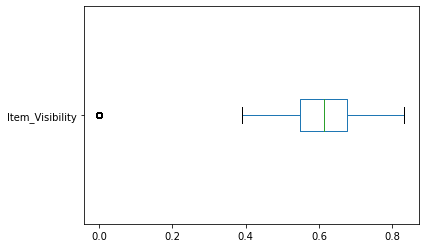

In [124]:
pd.read_csv('Data/train_clean.csv')['Item_Visibility'].plot(kind='box', vert=False)

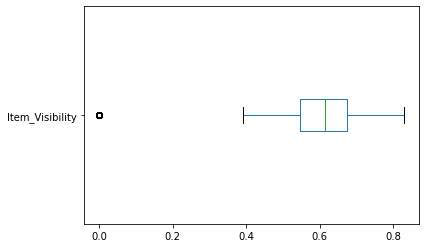

In [125]:
pd.read_csv('Data/test_clean.csv')['Item_Visibility'].plot(kind='box', vert=False)